# Flappy Bird with TD Learning

In [1]:
from environment import FlappyEnvironment
from agent import Sarsa, QLearning, ExpectedSarsa

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import sys

pygame 1.9.6
Hello from the pygame community. https://www.pygame.org/contribute.html


In [2]:
%matplotlib inline
np.random.seed(42)

In [3]:
env = FlappyEnvironment()

In [4]:
n_episodes = 10000
n_episodes_range = [x+1 for x in range(n_episodes)]

In [5]:
def plot_training_results(result_df, algorithm_title, figure_filename, figsize=(16,6)):
    plt.subplots(figsize=figsize)
    plt.plot(result_df.index, result_df['score'], label='Scores', color='b')
    plt.plot(result_df.index, result_df['score'].rolling(window=100).mean(), label='Avg Scores every 100 episodes', color='red')
    plt.title(algorithm_title)
    plt.ylabel('Score')
    plt.xlabel('# Episodes')
    plt.legend()
    plt.savefig(f'images/{figure_filename}.png')
    plt.show()

In [6]:
def get_epsilon(n_episode):
    return 1 - 0.045 * n_episode

## Sarsa

In [7]:
sarsa = Sarsa(action_space=env.action_space)

In [8]:
sarsa_scores = []

for i_episode in range(1, n_episodes + 1):
    env = FlappyEnvironment()
    sarsa.learn(env)
    sarsa_scores.append(env.game_score)
    
    if i_episode % 100 == 0:
        print("\rEpisode {}/{} - Max Score {}".format(i_episode, n_episodes, np.array(sarsa_scores).max()), end="")
        sys.stdout.flush()
    
    sarsa.epsilon = get_epsilon(i_episode)
        
sarsa.save_q_values()
sarsa_df = pd.DataFrame(data=sarsa_scores, index=n_episodes_range, columns=['score'])

Episode 10000/10000 - Max Score 0

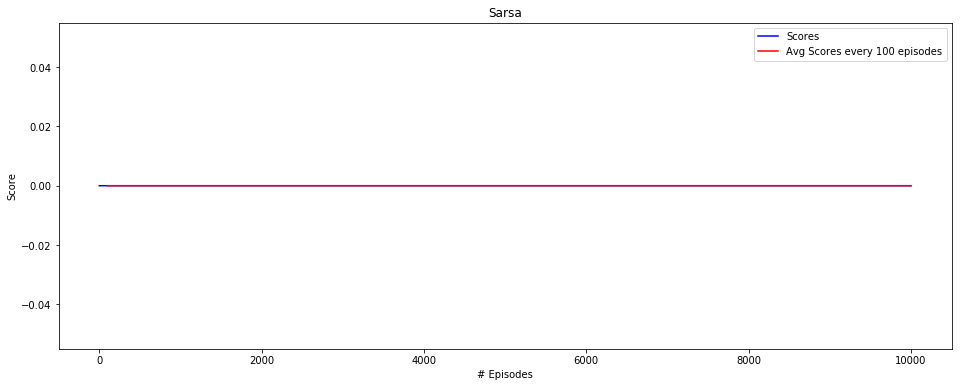

In [9]:
plot_training_results(sarsa_df, "Sarsa", "sarsa_training_scores")

## Q-Learning

In [10]:
qlearning = QLearning(action_space=env.action_space)

In [11]:
q_learning_scores = []

for i_episode in range(1, n_episodes + 1):
    env = FlappyEnvironment()
    if i_episode % 100 == 0:
        print("\rEpisode {}/{} - Max Score {}".format(i_episode, n_episodes, np.array(q_learning_scores).max()), end="")
        sys.stdout.flush()
        
    qlearning.learn(env)
    q_learning_scores.append(env.game_score)
    qlearning.epsilon = get_epsilon(i_episode)
    
qlearning.save_q_values()
q_learning_df = pd.DataFrame(data=q_learning_scores, index=n_episodes_range, columns=['score'])

Episode 10000/10000 - Max Score 4

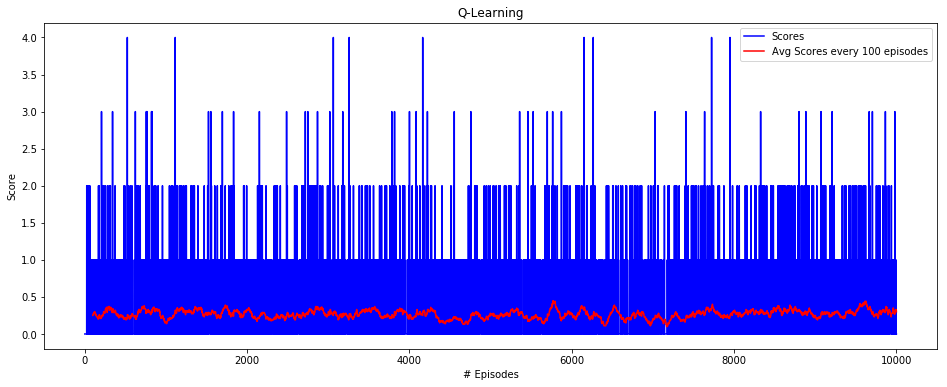

In [12]:
plot_training_results(q_learning_df, "Q-Learning", "q_learning_training_scores")

## Expected Sarsa

In [13]:
expected_sarsa = ExpectedSarsa(env.action_space)

In [14]:
expected_sarsa_scores = []

for i_episode in range(1, n_episodes + 1):
    env = FlappyEnvironment()
    if i_episode % 100 == 0:
        print("\rEpisode {}/{} - Max Score {}".format(i_episode, n_episodes, np.array(expected_sarsa_scores).max()), end="")
        sys.stdout.flush()
        
    expected_sarsa.learn(env)
    expected_sarsa_scores.append(env.game_score)
    expected_sarsa.epsilon = get_epsilon(i_episode)
    
expected_sarsa.save_q_values()
expecte_sarsa_df = pd.DataFrame(data=expected_sarsa_scores, index=n_episodes_range, columns=['score'])

Episode 10000/10000 - Max Score 1

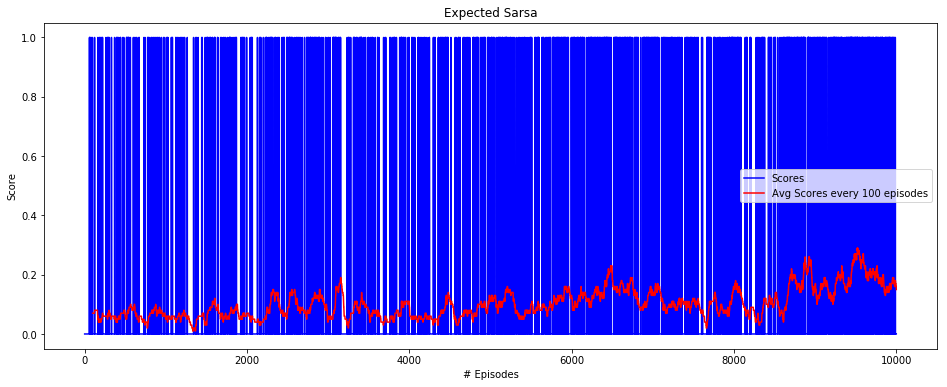

In [15]:
plot_training_results(expecte_sarsa_df, "Expected Sarsa", "expected_sarsa_training_scores")

# Model Comparison

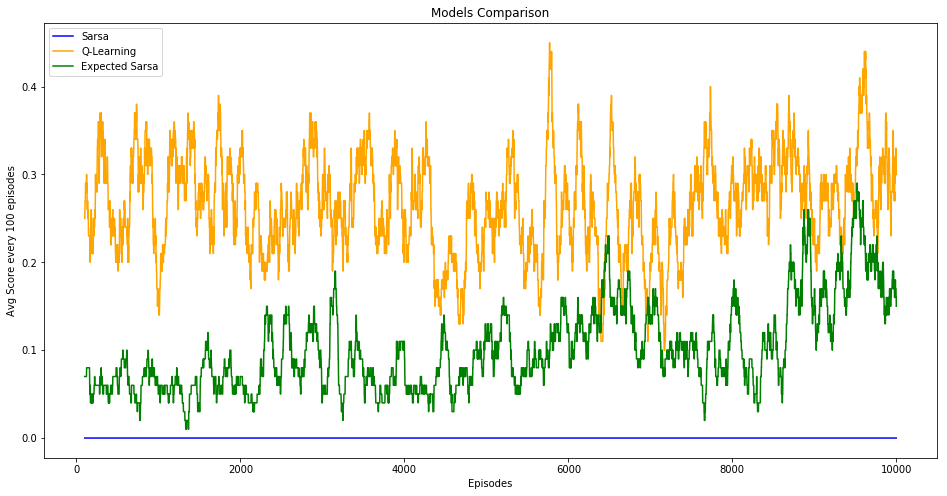

In [16]:
plt.subplots(figsize=(16, 8))
plt.title("Models Comparison")
plt.plot(sarsa_df.index, sarsa_df['score'].rolling(window=100).mean(), label='Sarsa', color='blue')
plt.plot(q_learning_df.index, q_learning_df['score'].rolling(window=100).mean(), label='Q-Learning', color='orange')
plt.plot(expecte_sarsa_df.index, expecte_sarsa_df['score'].rolling(window=100).mean(), label='Expected Sarsa', color='green')
plt.xlabel('Episodes')
plt.ylabel("Avg Score every 100 episodes")
plt.legend()
plt.savefig("images/model_comparison.png")
plt.show()

In [18]:
sarsa_final_score = sarsa_df['score'].rolling(window=100).mean().tail(1)
qlearning_final_score = q_learning_df['score'].rolling(window=100).mean().tail(1)
expected_sarsa_final_score = expecte_sarsa_df['score'].rolling(window=100).mean().tail(1)

In [35]:
pd.DataFrame(
    {
        'Sarsa': sarsa_final_score,
        'Q-Learning': qlearning_final_score,
        'Expected Sarsa': expected_sarsa_final_score,
        'Benchmark Model': 675,
        'AvgScore100': 'AvgScore100'
    }
).set_index("AvgScore100")

,Sarsa,Q-Learning,Expected Sarsa,Benchmark Model
AvgScore100,,,,
AvgScore100,0.0,0.3,0.15,675
